# Assignment 10

In [1]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

In [2]:
# Load datasets here once and assign to variables iris and boston
iris = ds.load_iris()

### Q1
Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a
separate Python list containing target names

In [3]:
iris_df = pd.DataFrame(iris['data'])
iris_df = iris_df.rename({index: value for index, value in enumerate(iris['feature_names'])}, axis='columns')

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
target_names = iris['target_names'].tolist()
target_names

['setosa', 'versicolor', 'virginica']

## Q2
Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in 
argument new_observations. Return back the target names of each prediction (and not their encoded values,
 i.e. return setosa instead of 0).

In [10]:
y = iris["target"]
X = iris_df.values
knn = KNN(n_neighbors=5)
knn.fit(X, y)
new_observations = np.array([[4.7,2.2,1.8,0.2]])
#new_observations.reshape(1, -1)
y_pred = knn.predict(new_observations)
[target_names[n] for n in y_pred]

['setosa']

## Q3
* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors

* Generate and return back an accuracy score using the test data that was split out

In [7]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2, random_state=21, stratify=y)
neighbors = 5
knn = KNN(n_neighbors=neighbors)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9666666666666667

## Q4
Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

In [8]:
neighbors = np.arange(1, 31)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
    # Set up a KNN Classifier
    knn = KNN(n_neighbors=neighbor)
  
    # Fit the model
    knn.fit(X_train, y_train)
  
    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

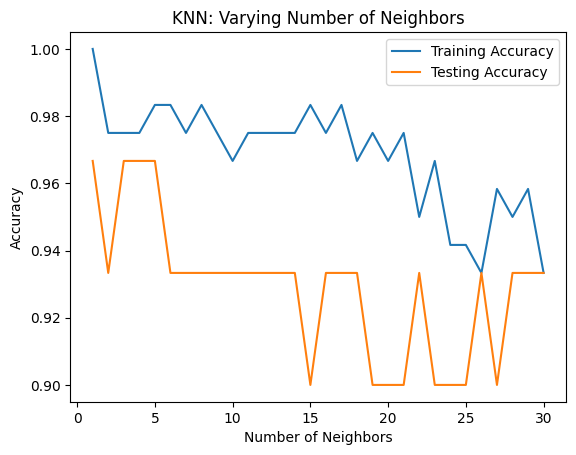

In [9]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()